In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from src import Helpers


### Summary from Wikipedia

In [3]:

# Read the text file into a DataFrame
summary_df = Helpers.load_data("plot_summaries.txt")

first_summary = summary_df.loc[0, 'Summary']
print(first_summary)
summary_df.head()

Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.


,Wiki_movie_id,Summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [4]:
# Calculate statistics on the length of each summary and add it to a new column
summary_df['Summary Length'] = summary_df['Summary'].apply(lambda x: len(x))

# Calculate summary statistics using the describe() method
print(summary_df['Summary Length'].describe())

summary_df.drop(columns=['Summary Length'], inplace=True)

count    42303.000000
mean      1784.034229
std       1808.925536
min         99.000000
25%        508.000000
50%       1079.000000
75%       2604.500000
max      28159.000000
Name: Summary Length, dtype: float64


### Movie Metadata

In [5]:
movie_df = Helpers.load_data("movie.metadata.tsv")
movie_df.head()


,Wiki_movie_id,Fb_movie_id,Movie name,release_date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,03vyhn,Ghosts of Mars,2001.0,14010832.0,98.0,English,United States of America,"Thriller, Science Fiction, Horror, Adventure, ..."
1,3196793,08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,NaN,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
2,28463795,0crgdbh,Brun bitter,1988.0,NaN,83.0,Norwegian,Norway,"Crime Fiction, Drama"
3,9363483,0285_cd,White Of The Eye,1987.0,NaN,110.0,English,United Kingdom,"Thriller, Erotic thriller, Psychological thriller"
4,261236,01mrr1,A Woman in Flames,1983.0,NaN,106.0,German,Germany,Drama


In [6]:
movie_df

,Wiki_movie_id,Fb_movie_id,Movie name,release_date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,03vyhn,Ghosts of Mars,2001.0,14010832.0,98.0,English,United States of America,"Thriller, Science Fiction, Horror, Adventure, ..."
1,3196793,08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,NaN,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
2,28463795,0crgdbh,Brun bitter,1988.0,NaN,83.0,Norwegian,Norway,"Crime Fiction, Drama"
3,9363483,0285_cd,White Of The Eye,1987.0,NaN,110.0,English,United Kingdom,"Thriller, Erotic thriller, Psychological thriller"
4,261236,01mrr1,A Woman in Flames,1983.0,NaN,106.0,German,Germany,Drama
...,...,...,...,...,...,...,...,...,...
81736,35228177,0j7hxnt,Mermaids: The Body Found,2011.0,NaN,120.0,English,United States of America,Drama
81737,34980460,0g4pl34,Knuckle,2011.0,NaN,96.0,English,"Ireland, United Kingdom","Biographical film, Drama, Documentary"
81738,9971909,02pygw1,Another Nice Mess,1972.0,NaN,66.0,English,United States of America,"Satire, Comedy"
81739,913762,03pcrp,The Super Dimension Fortress Macross II: Lover...,1992.0,NaN,150.0,Japanese,Japan,"Science Fiction, Japanese Movies, Adventure, A..."


In [7]:
movie_df['Movie box office revenue'].isna().mean()

0.8972241592346558

In [8]:
r = movie_df[movie_df['Movie countries']=='Russia']
# Extract the year from 'release_date'
r['year'] = r['release_date']

C:\Users\erwan\AppData\Local\Temp\ipykernel_16532\2844673546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r['year'] = r['release_date']


In [9]:
# Split the 'Movie genres' column by commas and create a list of genres
genres_list = movie_df['Movie genres'].str.split(', ').explode()

# Get unique genres
unique_genres = genres_list.unique()

# Print all unique genres
for genre in unique_genres:
    print(genre)

# Filter and get all genres that contain the word "war"
#war_genres = movie_df[movie_df['Movie genres'].str.contains('war', case=False, na=False)]['Movie genres']



Thriller
Science Fiction
Horror
Adventure
Supernatural
Action
Space western
Mystery
Biographical film
Drama
Crime Drama
Crime Fiction
Erotic thriller
Psychological thriller
Short Film
Silent film
Indie
Black-and-white
Comedy
Family Film
Fantasy
World cinema
Musical
Japanese Movies
Action/Adventure
Romantic comedy
Ensemble Film
Comedy-drama
Romantic drama
Romance Film
Costume drama
War film
Epic
Period piece
Film adaptation
Animation
Children's/Family
Children's Fantasy

Future noir
Comedy film
Coming of age
Suspense
Crime Thriller
Black comedy
Bollywood
Marriage Drama
Wuxia
Martial Arts Film
Chinese Movies
Western
Parody
Mockumentary
Fan film
Cult
Adventure Comedy
Slapstick
Biopic [feature]
Historical Epic
Sports
Family Drama
Political drama
Historical fiction
Courtroom Drama
Culture & Society
Biography
Documentary
Christmas movie
Television movie
Malayalam Cinema
Historical drama
Action Comedy
Blaxploitation
Erotica
Sci-Fi Horror
Satire
Epic Western
Gangster Film
Softcore Porn
Sexploi

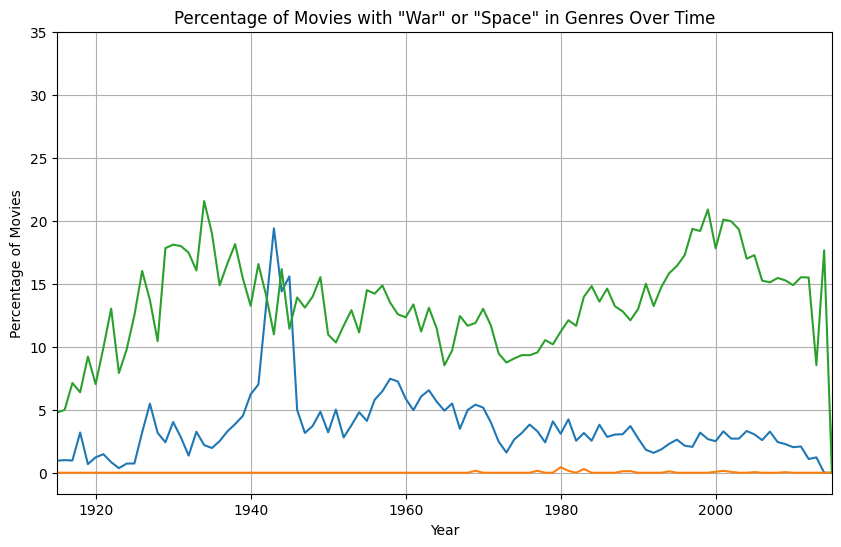

In [10]:
# Extract the year from 'release_date'
movie_df['year'] = movie_df['release_date']

# Create a binary column indicating if genres contain "war"
movie_df['contains_war'] = movie_df['Movie genres'].str.contains('war', case=False, na=False)
movie_df['contains_space'] = movie_df['Movie genres'].str.contains('space', case=False, na=False)
movie_df['contains_love'] = movie_df['Movie genres'].str.contains('Rom', case=False, na=False)

# Group by year and calculate the percentage of movies with genres containing "war"
percentage_contains_space = movie_df.groupby('year')['contains_space'].mean() * 100
percentage_contains_war =  movie_df.groupby('year')['contains_war'].mean() * 100

percentage_contains_love = movie_df.groupby('year')['contains_love'].mean() * 100


# Plot the evolution of the percentage
plt.figure(figsize=(10, 6))
percentage_contains_war.plot(kind='line')
percentage_contains_space.plot(kind='line')
percentage_contains_love.plot(kind='line')
plt.xlim([1915,2015])
plt.title('Percentage of Movies with "War" or "Space" in Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Movies')
plt.grid(True)
plt.show()

# Drop the 'contains_war' column
movie_df = movie_df.drop(columns=['contains_war'])
movie_df = movie_df.drop(columns=['contains_space'])
movie_df = movie_df.drop(columns=['contains_love'])

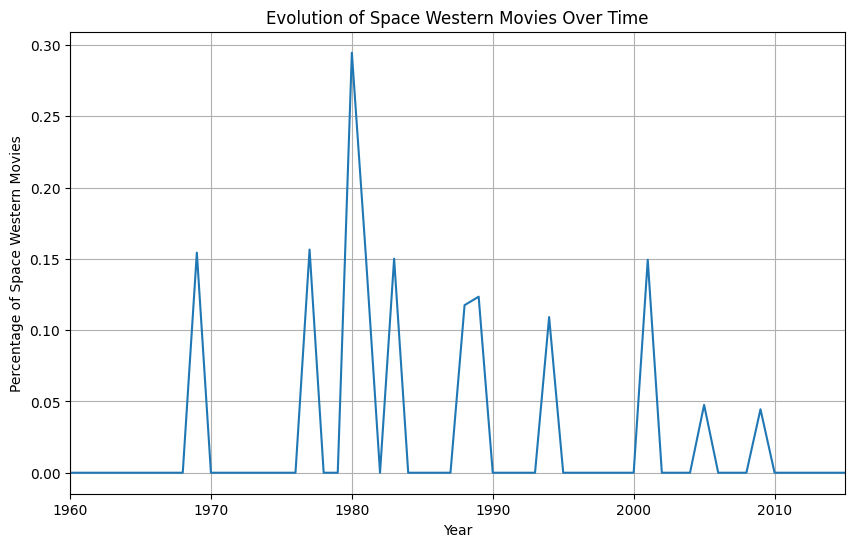

In [11]:
# Convert 'release_date' to datetime type
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'], format='%Y', errors='coerce')

# Extract the year from 'release_date'
movie_df['year'] = movie_df['release_date'].dt.year

# Create a binary column indicating 'space western' genre
movie_df['is_space_western'] = movie_df['Movie genres'].str.contains('space western', case=False, na=False)

# Group by year and calculate the percentage of movies with 'space western'
percentage_space_western = movie_df.groupby('year')['is_space_western'].mean() * 100

# Plot the evolution of the percentage
plt.figure(figsize=(10, 6))
plt.xlim([1960,2015])
percentage_space_western.plot(kind='line')
plt.title('Evolution of Space Western Movies Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Space Western Movies')
plt.grid(True)
plt.show()

<Axes: >

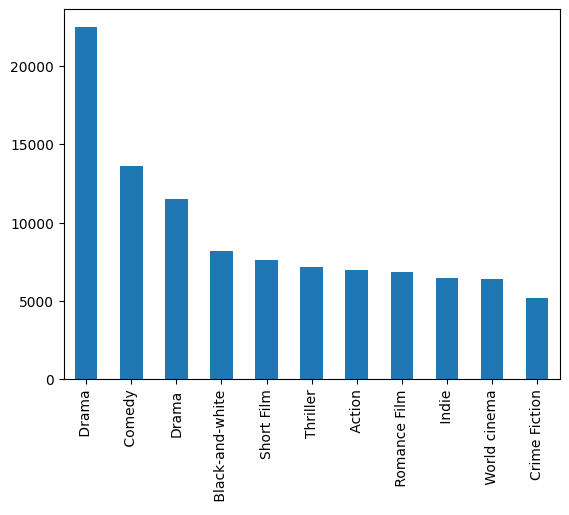

In [12]:
movie_genres = movie_df['Movie genres'].str.get_dummies(sep=',').sum().sort_values(ascending=False)
movie_genres.loc[movie_genres.values>=5000].plot(kind='bar')

### Character data

In [13]:
character_df = Helpers.load_data("character.metadata.tsv")

character_df.head()

,Wiki_movie_id,Fb_movie_id,release_date,Character,Actor date of birth,Actor gender,Actor_height,Fb_actor_ethnicity_id,Actor_name,Actor_age,Freebase character/actor map ID,Fb_char_id,Fb_actor_id
0,975900,03vyhn,2001.0,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,0bgchxw,0bgcj3x,03wcfv7
1,975900,03vyhn,2001.0,Lieutenant Melanie Ballard,1974-08-15,F,1.780,044038p,Natasha Henstridge,27.0,0jys3m,0bgchn4,0346l4
2,975900,03vyhn,2001.0,Desolation Williams,1969-06-15,M,1.727,0x67,Ice Cube,32.0,0jys3g,0bgchn_,01vw26l
3,975900,03vyhn,2001.0,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,02vchl6,0bgchnq,034hyc
4,975900,03vyhn,2001.0,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,02vbb3r,0bgchp9,01y9xg


In [14]:
# Sort the DataFrame by 'Fb_actor_id', 'Actor_age', and 'Character'
character_df = character_df.sort_values(['Fb_actor_id', 'Actor_age', 'Character'])

# Create a mask to identify the major roles (Character is not NaN)
major_role_mask = character_df['Character'].notna()

# Calculate the i-th film for each actor based on major roles
character_df['Film_Index'] = (major_role_mask.groupby(character_df['Fb_actor_id']).cumsum()
                    .where(major_role_mask, np.nan))  # Set 0 for minor roles
stat = character_df[character_df['Actor_name']== "Johnny Depp"]
stat.head()


,Wiki_movie_id,Fb_movie_id,release_date,Character,Actor date of birth,Actor gender,Actor_height,Fb_actor_ethnicity_id,Actor_name,Actor_age,Freebase character/actor map ID,Fb_char_id,Fb_actor_id,Film_Index
120977,3028191,08ll52,1984.0,Glen Lantz,1963-06-09,M,1.78,01qhm_,Johnny Depp,21.0,0jsvh6,0csqbm,0jfx1,1.0
351263,3514297,09hq9g,1985.0,Jack,1963-06-09,M,1.78,01qhm_,Johnny Depp,21.0,03lfl4k,04fll8n,0jfx1,2.0
22381,19315787,04lgx5r,1986.0,Donnie Fleischer,1963-06-09,M,1.78,01qhm_,Johnny Depp,23.0,04q4cj_,0gxq38m,0jfx1,3.0
229949,113460,0sxmx,1986.0,Gator Lerner,1963-06-09,M,1.78,01qhm_,Johnny Depp,23.0,0k1yz8,02nwky0,0jfx1,4.0
441458,6614818,0gdv4x,1989.0,NaN,1963-06-09,M,1.78,01qhm_,Johnny Depp,25.0,0h9hhm2,NaN,0jfx1,NaN


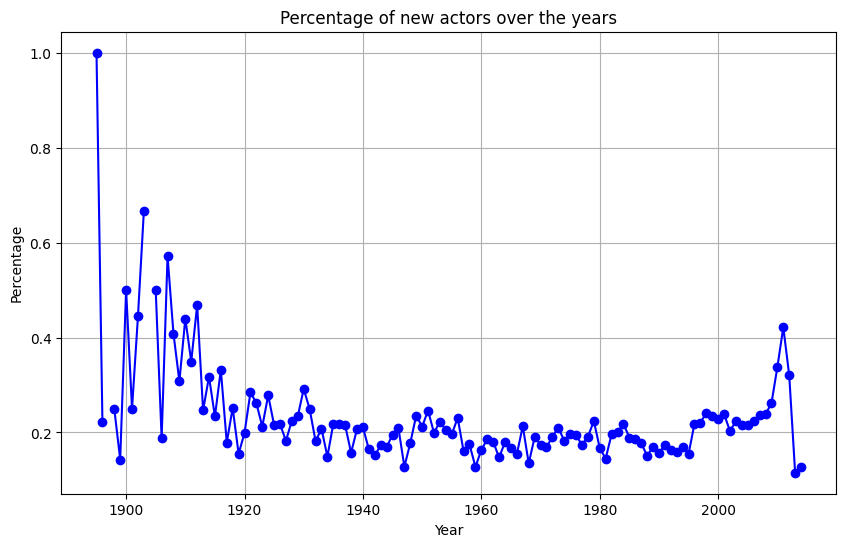

In [15]:
# Filter major roles (Character is not NaN)
major_roles = character_df[character_df['Character'] != 'NaN']

# Group by release date and calculate the number of actors with Film_Index equal to 1 or higher
actors_by_year = major_roles.groupby('release_date')['Fb_actor_id'].nunique()

# Group by release date and calculate the number of actors with Film_Index equal to 1
actors_with_index_1_by_year = major_roles[major_roles['Film_Index'] == 1].groupby('release_date')['Fb_actor_id'].nunique()

# Calculate the ratio of actors with Film_Index 1 to actors with Film_Index 1 or higher for each year
ratio = actors_with_index_1_by_year / actors_by_year

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(ratio.index, ratio, marker='o', linestyle='-', color='b')
plt.title('Percentage of new actors over the years')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.grid(True)
plt.show()

In [16]:
# Read the text file into a DataFrame
char_cluster_df = Helpers.load_data("name.clusters.txt")

char_cluster_df.head()

,Name,Fb_char_actor_id
0,Stuart Little,0k3w9c
1,Stuart Little,0k3wcx
2,Stuart Little,0k3wbn
3,John Doe,0jyg35
4,John Doe,0k2_zn


In [17]:
# Read the text file into a DataFrame
tvtropes_df = Helpers.load_data("tvtropes.clusters.txt")

tvtropes_df.head()

,CharType,Char,Movie,Fb_char_actor_id,Actor
0,absent_minded_professor,Professor Philip Brainard,Flubber,0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,0k3rhh,James Spader


In [28]:
# Perform an outer merge to retain all rows
merged_data = character_df.merge(tvtropes_df, left_on=['Freebase character/actor map ID', 'Character'], right_on=['Fb_char_actor_id', 'Char'], how='outer')
# Drop the specified columns
merged_data.drop(columns=['Actor', 'Char', 'Movie'], inplace=True)

# Drop rows with NaN values in the 'CharType' column
merged_data.dropna(subset=['CharType'], inplace=True)
# Display the merged data
merged_data


,Wiki_movie_id,Fb_movie_id,release_date,Character,Actor date of birth,Actor gender,Actor_height,Fb_actor_ethnicity_id,Actor_name,Actor_age,Freebase character/actor map ID,Fb_char_id,Fb_actor_id,Film_Index,CharType,Fb_char_actor_id
680,2087781,06l9q0,1985.0,Jake,1955-01-18,M,1.850,09vc4s,Kevin Costner,30.0,0k39jj,0g_vt8w,0127m7,5.0,young_gun,0k39jj
1720,142430,011yhm,1996.0,Gaear Grimsrud,1953-08-27,M,1.892,065b6q,Peter Stormare,42.0,0jy2x0,04mn0r0,012q4n,1.0,psycho_for_hire,0jy2x0
2053,598397,02t_h3,2004.0,Shaun,1970-02-14,M,1.780,NaN,Simon Pegg,34.0,0k35n0,0gxnhy3,012x2b,6.0,slacker,0k35n0
2062,8172248,026rrf_,2007.0,Dennis,1970-02-14,M,1.780,NaN,Simon Pegg,37.0,03lvx8n,0gxnhw4,012x2b,15.0,loser_protagonist,03lvx8n
2065,14280823,03c_4fq,2008.0,Sidney Young,1970-02-14,M,1.780,NaN,Simon Pegg,38.0,040l_q8,0gxnhyk,012x2b,18.0,loser_protagonist,040l_q8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449277,453236,02bc6c,1982.0,Jeff Spicoli,1960-08-17,M,1.770,041rx,Sean Penn,21.0,0jy30b,02nwdx9,0sz28,2.0,stoner,0jy30b
449278,453236,02bc6c,1982.0,Jeff Spicoli,1960-08-17,M,1.770,041rx,Sean Penn,21.0,0jy30b,02nwdx9,0sz28,2.0,surfer_dude,0jy30b
449331,1024501,03_8cd,1984.0,Conan the Barbarian,1947-07-30,M,1.880,019lrz,Arnold Schwarzenegger,36.0,0jwmfk,01z02,0tc7,9.0,revenge,0jwmfk
449794,30006,07cyl,1991.0,Hannibal Lecter,1937-12-31,M,1.740,02g7sp,Anthony Hopkins,53.0,0k6g86,0162dh,0z4s,31.0,charmer,0k6g86


In [37]:
merged_data[merged_data['CharType']== 'dumb_blonde']

,Wiki_movie_id,Fb_movie_id,release_date,Character,Actor date of birth,Actor gender,Actor_height,Fb_actor_ethnicity_id,Actor_name,Actor_age,Freebase character/actor map ID,Fb_char_id,Fb_actor_id,Film_Index,CharType,Fb_char_actor_id
9416,201553,01cms4,1997.0,Michele Weinberger,1963-07-30,F,1.730,041rx,Lisa Kudrow,33.0,0k2p5j,02vz486,016tb7,3.0,dumb_blonde,0k2p5j
27339,201553,01cms4,1997.0,Romy White,1967-09-28,F,1.780,0xnvg,Mira Sorvino,29.0,0k2p5c,04fgyvv,01phtd,11.0,dumb_blonde,0k2p5c
27469,880056,03l6q0,2003.0,Cindy Campbell,1976-11-29,F,1.650,07bch9,Anna Faris,26.0,0k2z05,0g3h_5,01pk3z,6.0,dumb_blonde,0k2z05
27476,2486990,07h9gp,2006.0,Cindy Campbell,1976-11-29,F,1.650,07bch9,Anna Faris,29.0,0k2y_7,0g3h_5,01pk3z,13.0,dumb_blonde,0k2y_7
27482,17916735,047m6mv,2009.0,Brandi,1976-11-29,F,1.650,07bch9,Anna Faris,32.0,059sp8v,0gy9z5m,01pk3z,19.0,dumb_blonde,059sp8v
29162,3339200,096mjj,1933.0,Kitty Packard,1911-03-03,F,1.550,NaN,Jean Harlow,22.0,0jx9zj,0h2zslv,01qzdl,17.0,dumb_blonde,0jx9zj
165788,1883157,063hp4,1952.0,Lina Lamont,1923-08-03,F,NaN,NaN,Jean Hagen,28.0,0k3b2r,02nwm77,04ql20,2.0,dumb_blonde,0k3b2r
169161,911882,03p5xc,1953.0,Pola Debevoise,1926-06-01,F,1.660,04f581,Marilyn Monroe,27.0,0jzmyb,0c1ghxz,04wqr,20.0,dumb_blonde,0jzmyb
177489,25491,06cgf,1975.0,Rocky Horror - A Creation,1946-05-17,M,1.800,NaN,Peter Hinwood,29.0,02tb6wq,04p32hn,056gh8,1.0,dumb_blonde,02tb6wq
182847,284619,01pvl7,1995.0,Suzanne Stone Maretto,1967-06-20,F,1.791,03bkbh,Nicole Kidman,27.0,0k75t3,04dsqfd,05dbf,12.0,dumb_blonde,0k75t3


In [30]:
# Group the DataFrame by 'CharType' and calculate the mean and standard deviation
genre_stats = merged_data.groupby('CharType')['Film_Index'].agg(['mean', 'std']).reset_index()

# Rename the columns for clarity
genre_stats.columns = ['CharType', 'Average_Film_Index', 'Std_Film_Index']

# Display the resulting DataFrame
genre_stats

,CharType,Average_Film_Index,Std_Film_Index
0,absent_minded_professor,15.000000,12.806248
1,adventurer_archaeologist,15.000000,10.099505
2,arrogant_kungfu_guy,10.444444,14.900597
3,big_man_on_campus,5.428571,6.451283
4,bounty_hunter,14.600000,9.406853
...,...,...,...
67,tranquil_fury,15.571429,9.536896
68,trickster,17.000000,9.899495
69,valley_girl,7.000000,5.932959
70,warrior_poet,20.888889,17.989194


In [33]:
# Sort the genre_stats DataFrame by 'Average_Film_Index' in ascending order
sorted_genre_stats = genre_stats.sort_values('Average_Film_Index')

# Print the 5 genres with the least average 'Film_Index' values
print("Genres with the Least Average 'Film_Index':")
sorted_genre_stats.head(5)


Genres with the Least Average 'Film_Index':


,CharType,Average_Film_Index,Std_Film_Index
9,bully,1.333333,0.577350
15,classy_cat_burglar,2.000000,NaN
43,jerk_jock,2.111111,1.691482
7,bromantic_foil,2.600000,1.673320
34,final_girl,2.833333,1.329160


In [34]:
# Print the 5 genres with the maximum average 'Film_Index' values
print("\nGenres with the Maximum Average 'Film_Index':")
sorted_genre_stats.tail(5)


Genres with the Maximum Average 'Film_Index':


,CharType,Average_Film_Index,Std_Film_Index
23,dirty_cop,28.714286,21.822880
36,gentleman_thief,31.000000,23.974987
20,crazy_survivalist,31.666667,9.451631
62,storyteller,34.750000,41.756237
55,pupil_turned_to_evil,43.500000,31.819805


In [36]:
# Get unique values from the 'CharType' column
char_types = genre_stats['CharType'].unique()

# Print all the values of 'CharType'
print("All CharType values:")
for char_type in char_types:
    print(char_type)
char_types

All CharType values:
absent_minded_professor
adventurer_archaeologist
arrogant_kungfu_guy
big_man_on_campus
bounty_hunter
brainless_beauty
broken_bird
bromantic_foil
bruiser_with_a_soft_center
bully
byronic_hero
casanova
chanteuse
charmer
child_prodigy
classy_cat_burglar
consummate_professional
corrupt_corporate_executive
coward
crazy_jealous_guy
crazy_survivalist
cultured_badass
dean_bitterman
dirty_cop
ditz
doormat
drill_sargeant_nasty
dumb_blonde
dumb_muscle
eccentric_mentor
egomaniac_hunter
evil_prince
fastest_gun_in_the_west
father_to_his_men
final_girl
gadgeteer_genius
gentleman_thief
granola_person
grumpy_old_man
hardboiled_detective
heartbroken_badass
henpecked_husband
hitman_with_a_heart
jerk_jock
junkie_prophet
klutz
loser_protagonist
loveable_rogue
master_swordsman
morally_bankrupt_banker
officer_and_a_gentleman
ophelia
playful_hacker
prima_donna
psycho_for_hire
pupil_turned_to_evil
retired_outlaw
revenge
romantic_runnerup
self_made_man
slacker
stoner
storyteller
stupid_croo

array(['absent_minded_professor', 'adventurer_archaeologist',
       'arrogant_kungfu_guy', 'big_man_on_campus', 'bounty_hunter',
       'brainless_beauty', 'broken_bird', 'bromantic_foil',
       'bruiser_with_a_soft_center', 'bully', 'byronic_hero', 'casanova',
       'chanteuse', 'charmer', 'child_prodigy', 'classy_cat_burglar',
       'consummate_professional', 'corrupt_corporate_executive', 'coward',
       'crazy_jealous_guy', 'crazy_survivalist', 'cultured_badass',
       'dean_bitterman', 'dirty_cop', 'ditz', 'doormat',
       'drill_sargeant_nasty', 'dumb_blonde', 'dumb_muscle',
       'eccentric_mentor', 'egomaniac_hunter', 'evil_prince',
       'fastest_gun_in_the_west', 'father_to_his_men', 'final_girl',
       'gadgeteer_genius', 'gentleman_thief', 'granola_person',
       'grumpy_old_man', 'hardboiled_detective', 'heartbroken_badass',
       'henpecked_husband', 'hitman_with_a_heart', 'jerk_jock',
       'junkie_prophet', 'klutz', 'loser_protagonist', 'loveable_rogue',
  

In [39]:
word_category_mapping = {
    'absent_minded_professor': 'Intellectuals',
    'adventurer_archaeologist': 'Adventurers',
    'arrogant_kungfu_guy': 'Warriors and Fighters',
    'big_man_on_campus': 'Leadership and Authority',
    'bounty_hunter': 'Adventurers',
    'brainless_beauty': 'Comedic and Eccentric',
    'broken_bird': 'Quirky and Unique',
    'bromantic_foil': 'Comedic and Eccentric',
    'bruiser_with_a_soft_center': 'Antiheroes',
    'bully': 'Villains',
    'byronic_hero': 'Antiheroes',
    'casanova': 'Lovers and Romantics',
    'chanteuse': 'Intellectuals',
    'charmer': 'Lovers and Romantics',
    'child_prodigy': 'Intellectuals',
    'classy_cat_burglar': 'Villains',
    'consummate_professional': 'N/A',
    'corrupt_corporate_executive': 'Villains',
    'coward': 'Antiheroes',
    'crazy_jealous_guy': 'Villains',
    'crazy_survivalist': 'Quirky and Unique',
    'cultured_badass': 'Warriors and Fighters',
    'dean_bitterman': 'Leadership and Authority',
    'dirty_cop': 'Villains',
    'ditz': 'Comedic and Eccentric',
    'doormat': 'N/A',
    'drill_sargeant_nasty': 'Leadership and Authority',
    'dumb_blonde': 'Comedic and Eccentric',
    'dumb_muscle': 'Warriors and Fighters',
    'eccentric_mentor': 'Intellectuals',
    'egomaniac_hunter': 'Villains',
    'evil_prince': 'Villains',
    'fastest_gun_in_the_west': 'Warriors and Fighters',
    'father_to_his_men': 'Leadership and Authority',
    'final_girl': 'Classic Heroic Figures',
    'gadgeteer_genius': 'Intellectuals',
    'gentleman_thief': 'Villains',
    'granola_person': 'N/A',
    'grumpy_old_man': 'Quirky and Unique',
    'hardboiled_detective': 'Antiheroes',
    'heartbroken_badass': 'Antiheroes',
    'henpecked_husband': 'Comedic and Eccentric',
    'hitman_with_a_heart': 'Antiheroes',
    'jerk_jock': 'Leadership and Authority',
    'junkie_prophet': 'Quirky and Unique',
    'klutz': 'Comedic and Eccentric',
    'loser_protagonist': 'Antiheroes',
    'loveable_rogue': 'Lovers and Romantics',
    'master_swordsman': 'Warriors and Fighters',
    'morally_bankrupt_banker': 'Villains',
    'officer_and_a_gentleman': 'Leadership and Authority',
    'ophelia': 'Tragic Figures',
    'playful_hacker': 'N/A',
    'prima_donna': 'Comedic and Eccentric',
    'psycho_for_hire': 'Villains',
    'pupil_turned_to_evil': 'Villains',
    'retired_outlaw': 'Villains',
    'revenge': 'Villains',
    'romantic_runnerup': 'Lovers and Romantics',
    'self_made_man': 'Antiheroes',
    'slacker': 'Antiheroes',
    'stoner': 'Antiheroes',
    'storyteller': 'Intellectuals',
    'stupid_crooks': 'Comedic and Eccentric',
    'surfer_dude': 'Adventurers',
    'the_chief': 'Leadership and Authority',
    'the_editor': 'Quirky and Unique',
    'tranquil_fury': 'Warriors and Fighters',
    'trickster': 'Comedic and Eccentric',
    'valley_girl': 'Comedic and Eccentric',
    'warrior_poet': 'Warriors and Fighters',
    'young_gun': 'Classic Heroic Figures'
}

In [51]:
# Add a new column 'Category' to your DataFrame based on the 'CharType' column
merged_data['Category'] = merged_data['CharType'].map(word_category_mapping)

reduced_df = merged_data[['Actor gender','Category','Actor_age','release_date','Film_Index','Fb_actor_id','Actor_name']]
reduced_df

,Actor gender,Category,Actor_age,release_date,Film_Index,Fb_actor_id,Actor_name
680,M,Classic Heroic Figures,30.0,1985.0,5.0,0127m7,Kevin Costner
1720,M,Villains,42.0,1996.0,1.0,012q4n,Peter Stormare
2053,M,Antiheroes,34.0,2004.0,6.0,012x2b,Simon Pegg
2062,M,Antiheroes,37.0,2007.0,15.0,012x2b,Simon Pegg
2065,M,Antiheroes,38.0,2008.0,18.0,012x2b,Simon Pegg
...,...,...,...,...,...,...,...
449277,M,Antiheroes,21.0,1982.0,2.0,0sz28,Sean Penn
449278,M,Adventurers,21.0,1982.0,2.0,0sz28,Sean Penn
449331,M,Villains,36.0,1984.0,9.0,0tc7,Arnold Schwarzenegger
449794,M,Lovers and Romantics,53.0,1991.0,31.0,0z4s,Anthony Hopkins


In [66]:
# Create a pivot table to count the number of films in each category for each actor
pivot_table = reduced_df.pivot_table(index='Actor_name', columns='Category', values='Film_Index', aggfunc='count', fill_value=0)

# Reset the index and rename the columns
pivot_table.reset_index(inplace=True)
pivot_table.columns.name = None

# Display the resulting DataFrame
pivot_table

# Filter the rows where the sum of values is higher than 1 (we want to keep only actors who played in more than one film)
filtered_df = pivot_table[pivot_table.iloc[:, 1:].sum(axis=1) > 1]
filtered_df = filtered_df.set_index('Actor_name')

filtered_df

,Adventurers,Antiheroes,Classic Heroic Figures,Comedic and Eccentric,Intellectuals,Leadership and Authority,Lovers and Romantics,N/A,Quirky and Unique,Tragic Figures,Villains,Warriors and Fighters
Actor_name,,,,,,,,,,,,
Adam Sandler,0,0,0,3,0,0,0,0,0,0,0,1
Al Pacino,0,0,0,0,0,0,0,0,0,0,2,0
Alex Winter,1,1,0,0,0,0,0,0,0,0,0,0
Alicia Silverstone,0,0,0,2,0,0,0,0,0,0,0,0
Anna Faris,0,0,0,4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Tony Curran,0,0,0,0,0,0,1,0,0,0,1,0
Tony Leung Chiu Wai,0,0,0,0,0,0,0,0,0,0,0,2
Val Kilmer,0,0,0,0,1,0,0,0,0,0,0,1


c:\Users\erwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


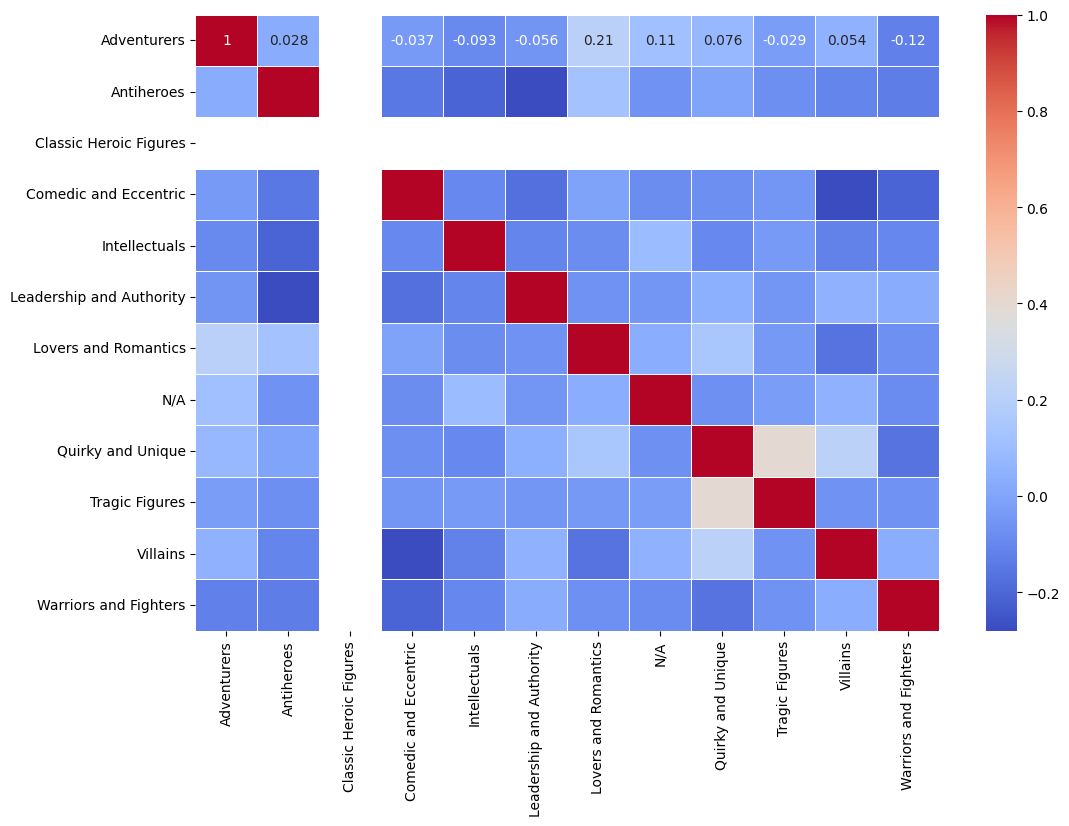

In [69]:
correlation_matrix = filtered_df.corr()

# Set the size of the heatmap
plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.show()

In [41]:
cat = merged_data['Category'].unique()
cat

array(['Classic Heroic Figures', 'Villains', 'Antiheroes', 'Adventurers',
       'N/A', 'Comedic and Eccentric', 'Tragic Figures',
       'Quirky and Unique', 'Lovers and Romantics', 'Intellectuals',
       'Warriors and Fighters', 'Leadership and Authority'], dtype=object)